## Lab 10 - Classification
Name: Dempsey Wade 

Class: CSCI 349 - Intro to Data Mining 

Semester: 2019SP 

Instructor: Brian King

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

import warnings
warnings.filterwarnings("ignore")

### 1) [P] Read about the Iris dataset. This is perhaps the most commonly used dataset to teach students how to build classification models: https://en.wikipedia.org/wiki/Iris_flower_data_set : Then, include the following code to import a copy of the Iris data: url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv" names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'] df_iris = pd.read_csv(url, names=names) Print out the results info to understand the types of each variable as read in from the csv file.

In [2]:
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
df_iris = pd.read_csv(url, names=names)
print(df_iris.head())
print(df_iris.info())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


### 2) [P] Be thankful for a moment, because the data are mostly clean. However, the species variable is not. Convert the variable to a pandas Categorical variable. Then show the distribution of your variable. Repeat the info() output to show that your variable is now categorical, and not merely an object.

In [3]:
df_iris.species = df_iris.species.astype('category')
print(df_iris.species.value_counts())
print(df_iris.info()) # dtypes: category

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: species, dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB
None


### 3) [P] Now, perform essential summarizing tasks on your data. Show the first 10 observations, show the output of describe(), and report the shape of your data. It's far more telling to generate good visualizations of your data. Always start with basic univariate plots.

### Create a boxplot of all four independent variables. (Be sure to leverage seaborn with a call to set_style() with a style of your choosing.) You may use the pandas interface to generate the boxplot. (Sometimes forquick visualizations, the pandas interface is simple and effective!) Look at the plot() method for pandas.DataFrame, and generate a boxplot of all four variables by species in a single plot with subplots. (NOTE: the boxplot() method may do this easier than using the plot() method.)

### Summarize the distribution of your four variables. Remember, this is a univariate exploration, so you don't care about the class variable yet.

In [4]:
df_iris.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [5]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


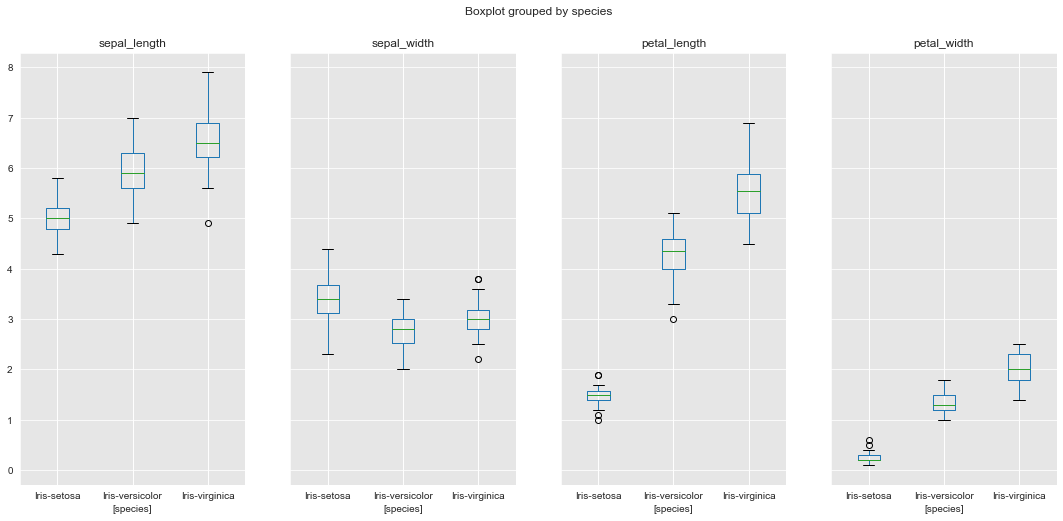

In [6]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
df_iris.boxplot(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], by=['species'], layout=(1,4), figsize=(18,8))
plt.show()

### 4) [P] Violin plots are becoming increasingly common in data science. First, what is a violin plot? Then, use seaborn's violinplot() function to generate a univariate violin plot of each independent variable. Compare and contrast your violin plot against the boxplot.

A violin plot is a graphical representation of numeric data. It looks almost like a box plot with thicker and thinner widths to demonstrate outliers. 

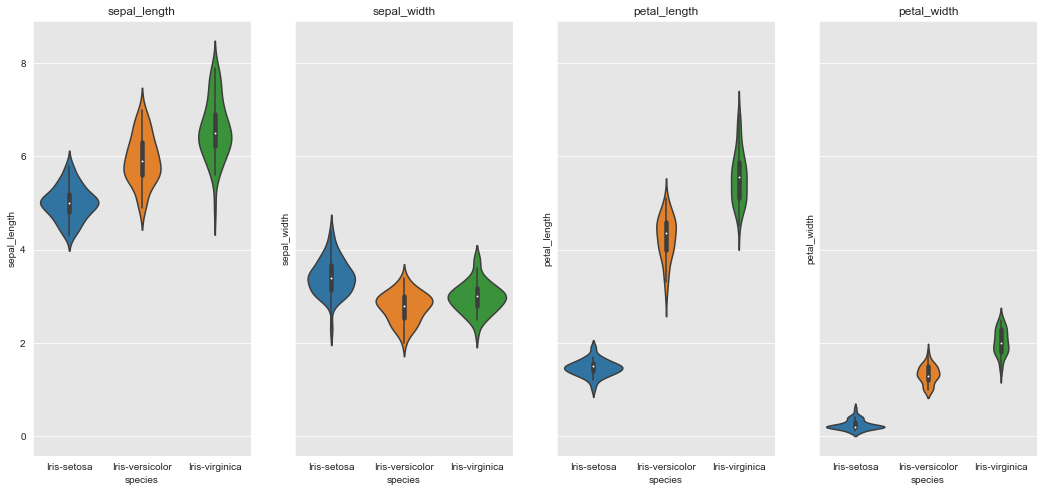

In [7]:
f,axes = plt.subplots(1, 4, sharey=True, figsize = (18,8))
g1 = sns.violinplot( 'species', 'sepal_length', data = df_iris, ax = axes[0])
g1.set_title('sepal_length')
g2 = sns.violinplot( 'species', 'sepal_width', data = df_iris, ax = axes[1])
g2.set_title('sepal_width')
g3 = sns.violinplot( 'species', 'petal_length', data = df_iris, ax = axes[2])
g3.set_title('petal_length')
g4 = sns.violinplot('species', 'petal_width', data = df_iris, ax = axes[3])
g4.set_title('petal_width')
plt.show()

The ovals in my violin plot are at the same y coordinate as the boxes are in my boxplot, so the results appear very similiar. Using my violin plot, you can see the width of normal boxes that you would not be able to see in a boxplot. This shows me which values were most frequent while also showing a boxplot of outliers. 

### 5) [P] Show a histogram and a density plot of each variable using whatever plotting method you prefer from matplotlib, seaborn, or pandas.

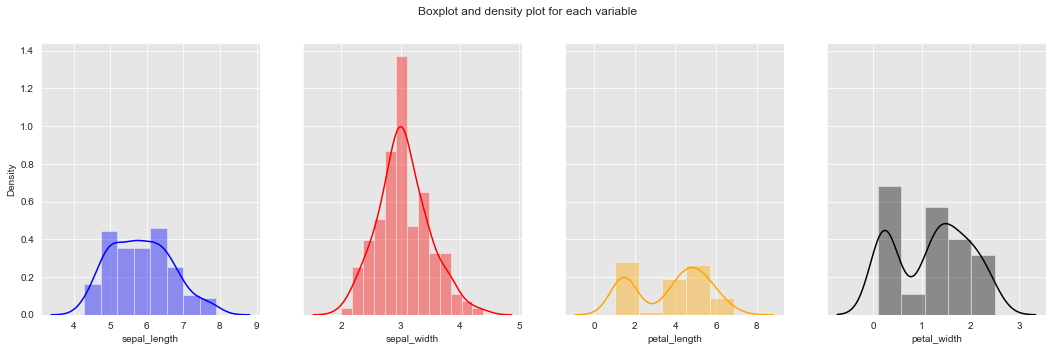

In [8]:
f,axes = plt.subplots(1,4,sharey=True,figsize=(18,5))
g1 = sns.distplot(df_iris.sepal_length, ax = axes[0], color = 'blue')
g2 = sns.distplot(df_iris.sepal_width, ax = axes[1], color = 'red')
g3 = sns.distplot(df_iris.petal_length, ax = axes[2], color = 'orange')
g4 = sns.distplot(df_iris.petal_width, ax = axes[3], color = 'black')
f.suptitle('Boxplot and density plot for each variable')
plt.show()

### 6) [P] Start by reading about the scatter_matrix() function in pandas. Use it to generate a scatterplot matrix, and use species for the color.

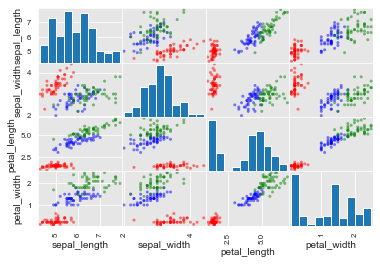

In [9]:
cmap = ['red','blue','green']
pd.plotting.scatter_matrix(df_iris, color = df_iris.species.cat.codes.apply(lambda x: cmap[x]))
plt.show()

### 7) [P] Read about the seaborn pairplot() function, then use it to generate one of the most useful scatterplots matrices you'll see with this data. Take a moment to study the plot, and really try to understand just how much this plot is conveying. Be sure to figure out how to distinguish the species by color.

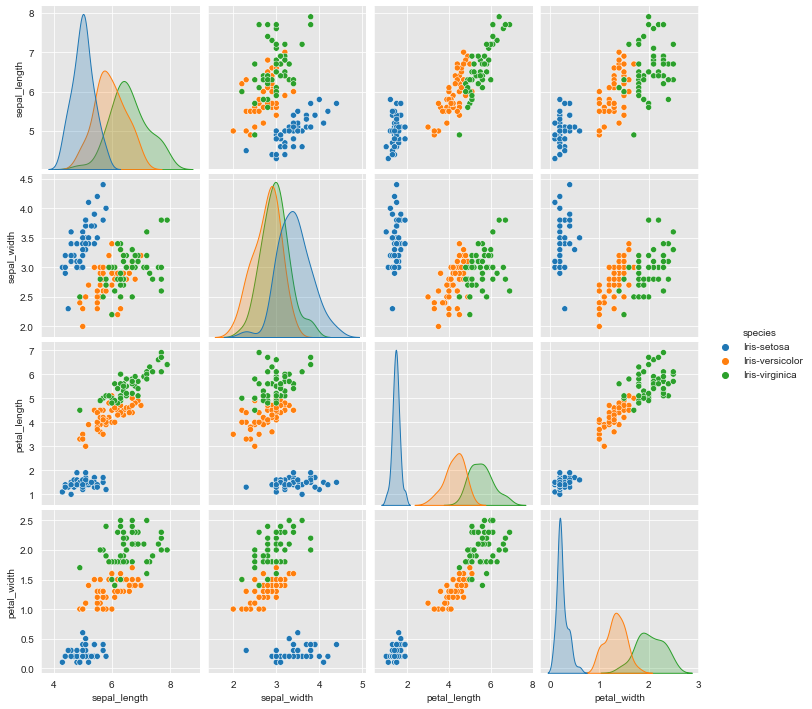

In [10]:
sns.pairplot(df_iris, hue='species')
plt.show()

### 8) [P] Perform another boxplot, but this time, use pandas to plot the boxplot, and specify by="species" as a parameter to perform grouping by species. (Also, use the figsize parameter to create a larger, more readable figure. For example figsize=(12,6))

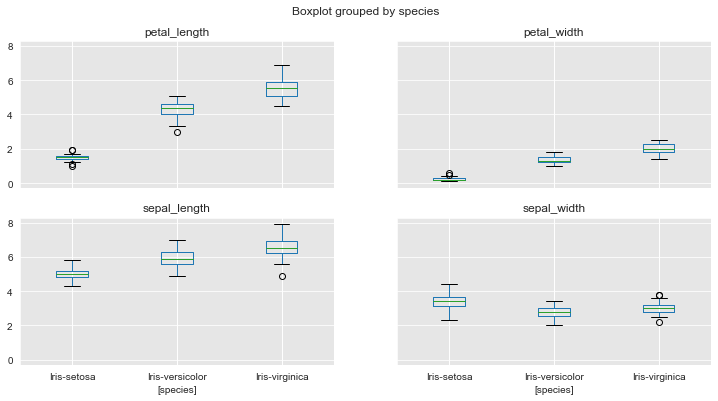

In [11]:
df_iris.boxplot( by=['species'], figsize=(12,6))
plt.show()

### 9) [M] From your observations, which species do you expect to have the best classifier performance? Why? 

I would expect the setosa to have the best classifier performance because it has the lowest distribution. The other two variables have a larger distribution in 3 of the 4 categories. 

### 10) [P] Create subsets of your data frame split into X and y, where X represents only your four predictor variables, and y represents only the target class, species. Output the names of the columns and the shape of both just to confirm that they both have the same number of observations, and that the number of variables in each are correct. You should have (150, 4), and (150, 1) respectively

In [12]:
X = df_iris[['sepal_length','sepal_width','petal_length','petal_width']]
y = df_iris[['species']]
print(X.columns)
print(X.shape)
print(y.columns)
print(y.shape)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')
(150, 4)
Index(['species'], dtype='object')
(150, 1)


### 11) As you learned in class, you need to create a train / test split of your data to properly validate your model. Read about sklearn.model_selection function called train_test_split. Then, use it to split your data into an 70% / 30% split of training and testing data, respectively. You should end up with four data frames, denoted X_train, X_test, Y_train, Y_test. Use an initial seed of 0. Be sure to shuffle the data (verify that this is a default setting.)

In [13]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0) 

### 12) Since we started with the decision tree model, let's begin there. The model we want to begin with is a DecisionTreeClassifier. You can read about it here: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

### (Generally, the sklearn documentation use the convention of clf for classifier objects. All classifiers have a common interface, which is awesome! You use fit() to train a model with training data, and predict() will predict a class label on any data it is given. A common interface like this makes is incredibly easy to try out different models on your data.)

### Create an instance of DecisionTreeClassifier with default parameters (be sure to read the docs to understand the large number of parameters available for controlling tree construction.) It should basically print out the model configuration. Use this model to predict back your training data to evaluate your model. Call your predictions y_pred_train.

In [14]:
clf = DecisionTreeClassifier() 
clf.fit(X_train, y_train)
y_pred_train = clf.predict(X_train)
y_pred_train
classes = clf.classes_

### 13) [P] Using your trained model, predict back the test data. Store your predictions in y_pred_test.

In [15]:
y_pred_test = clf.predict(X_test)
y_pred_test

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-setosa'], dtype=object)

### 14) [P] So, how did your model do? There are several ways to assess model performance. Rather than exhaustively compute them yourself, use scikit-learn's functionality in its metrics package to help you do this. Most of these will require you to pass the true labels (i.e. your "ground truth") as well as your predictions. Start by read about the function classification_report. Then, use it to print back the classification results on both your training and your test data, thus evaluating and validating your model. This is amazing! One line of code, and you have generated a full report, with metrics for each class.

In [16]:
print(classification_report(y_test, y_pred_test, target_names = clf.classes_))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



### 15) [M] Discuss what you are seeing with the classification report. What do the micro, macro, and weighted average readings mean? Is the accuracy measure is missing? Look at your micro avg readings. What do you think those are measuring? Which target class were most challenging to predict?

Micro yields an average of true positives, false negatives, and false positives. 
Macro yields an average of the unweighted mean. 
Virginica had the lowest percision so it was the most difficult to predict. 

### 16) [P] Quite often, when we have misclassifications, it's important to take the time to dig into your test data to determine which observations are being misclassified. Use data selection techniques to output the data in df_iris that are being misclassified.

In [17]:
df_iris.loc[(X_test[(y_pred_test != y_test.species).values].index) | (X_train[(y_pred_train != y_train.species).values].index)]

,sepal_length,sepal_width,petal_length,petal_width,species
83,6.0,2.7,5.1,1.6,Iris-versicolor


### 17) [P] It's even more interesting when you can visualize where in your feature space your classifier might be missing something. Create a scatterplot matrix, but this time, figure out how to highlight the instance(s) that are being misclassified. Can you create a new variable that represents the accuracy of the prediction? Use it as another dimension? A new color? A larger point size? Any scatter plot you can come up with that will highlight the location of the misclassified data receives full credit. This is an important step in understanding how to deal with problematic data.

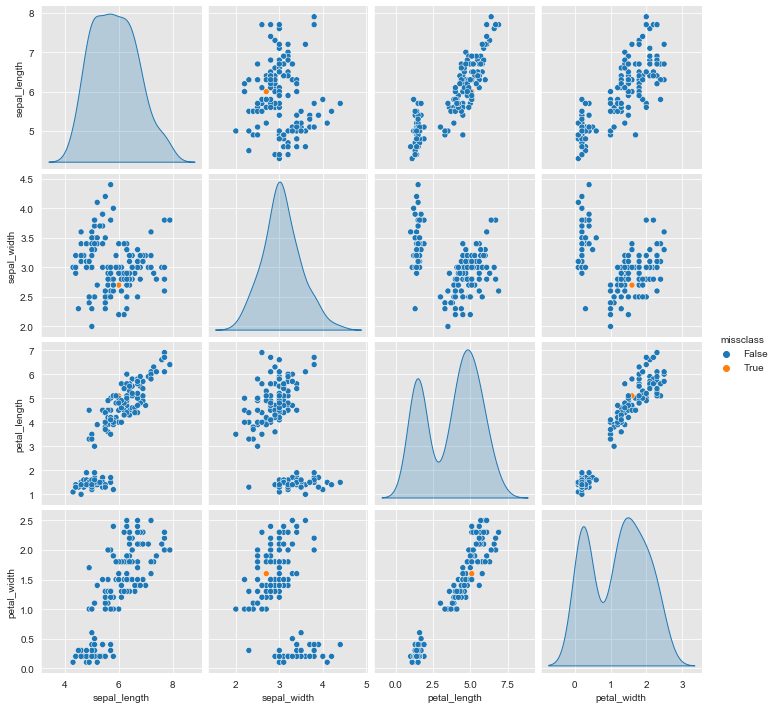

In [18]:
missclass = pd.concat([(y_pred_test != y_test.species), (y_pred_train != y_train.species)])
missclass .sort_index()
df_iris['missclass'] = missclass
sns.pairplot(df_iris, hue = "missclass")
plt.show()

### 18) [P] Read about sklearn.metrics.confusion_matrix, then output your confusion matrix on both your training and your test data. Remember, the species variable has 3 possible values, and thus you will have a 3x3 confusion matrix.

In [19]:
confusion_matrix(y_test, y_pred_test)

array([[16,  0,  0],
       [ 0, 17,  1],
       [ 0,  0, 11]])

### 19) [P] Read about the KFold class. State what a KFold cross validation object will do for you. Then, create an instance of KFold with 10 splits, an initial seed of 100, and be sure to shuffle your data. Call your model kfold.

In [20]:
kfold = KFold(n_splits = 10, shuffle = True, random_state = 100)

### 20) [P] Read about the split() method for KFold. It will help you iterate through each fold of your data. Take the time to understand how it works! If you set this up right, you will have a loop that will let you easily select train and test data for each fold. Once you do that, then you are merely repeated what you did already for the 70/30 split data above! For each fold, you fit a new model on the training data for that fold, then validate the model on the test data for the same fold. After 10 folds, you will have validated your model using your entire dataset as validation data!

In [21]:
df_results = pd.DataFrame([], columns = ['true y', 'prediction'])
for train_index, test_index in kfold.split(X):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    y_test = y_test['species']
    row = pd.DataFrame({'true y': y_test, 'prediction': y_pred})
    df_results = df_results.append(row)

### 21) [P] Print out a classification report from your 10 fold cross validation. Also print out your confusion matrix.

In [22]:
print(classification_report(df_results['prediction'], df_results['true y'], target_names = classes))
print(confusion_matrix(df_results['true y'], df_results['prediction']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        50
Iris-versicolor       0.94      0.94      0.94        50
 Iris-virginica       0.94      0.94      0.94        50

       accuracy                           0.96       150
      macro avg       0.96      0.96      0.96       150
   weighted avg       0.96      0.96      0.96       150

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


### 22) [P] Search scikit-learn for an example of plotting a confusion matrix. Use their code to plot your confusion matrix from the 10 fold cross validation.

[[50  0  0]
 [ 0 47  3]
 [ 0  3 47]]


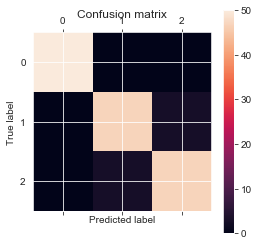

In [23]:
# From the website!
cm = confusion_matrix(df_results['true y'], df_results['prediction'])
print(cm)

plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

### 23) [P] Select and generate a report all of your test instances that were misclassified from the 10 fold cross validation. Also, generate a scatterplot that highlights the location of the instances that were misclassified.

In [24]:
y_pred_test = df_results['prediction']
y_test = df_results['true y']
missclass2 = pd.DataFrame(y_pred_test != y_test)
df_iris['missclass_kfold'] = missclass2
df_iris[df_iris['missclass_kfold'] == True]

,sepal_length,sepal_width,petal_length,petal_width,species,missclass,missclass_kfold
70,5.9,3.2,4.8,1.8,Iris-versicolor,False,True
77,6.7,3.0,5.0,1.7,Iris-versicolor,False,True
83,6.0,2.7,5.1,1.6,Iris-versicolor,True,True
106,4.9,2.5,4.5,1.7,Iris-virginica,False,True
119,6.0,2.2,5.0,1.5,Iris-virginica,False,True
129,7.2,3.0,5.8,1.6,Iris-virginica,False,True


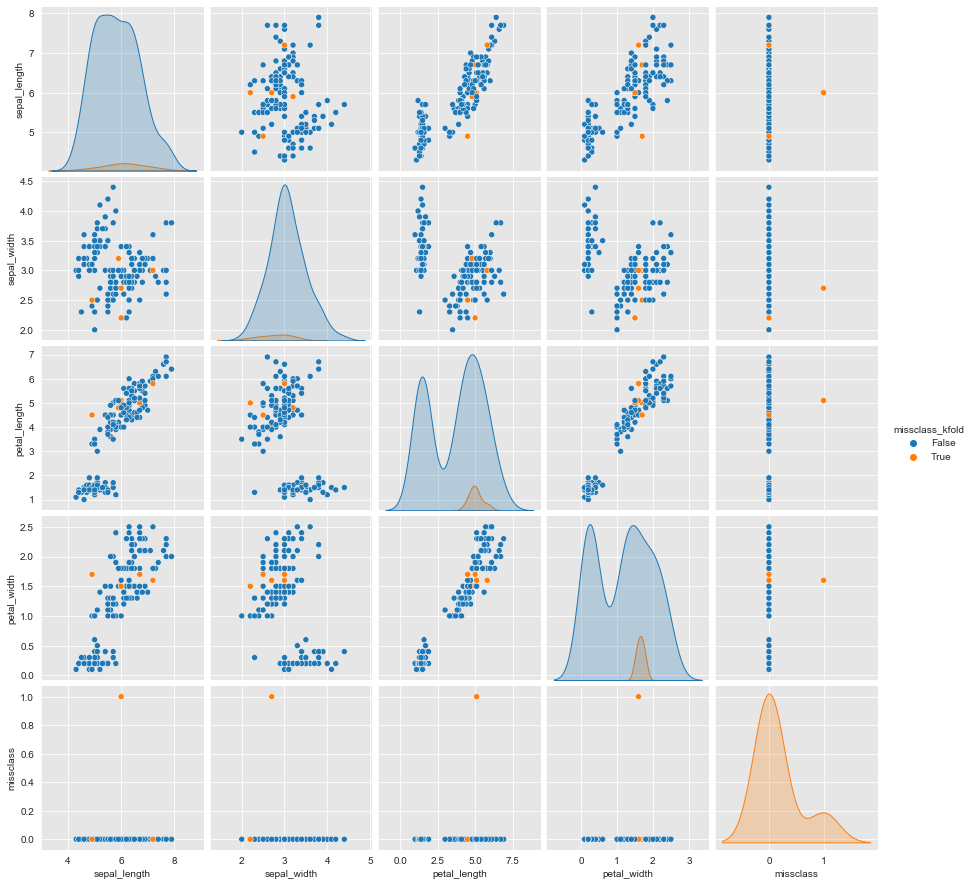

In [25]:
sns.pairplot(df_iris, hue = 'missclass_kfold')
plt.show()

### 24) [M] Discuss your findings with your model performance after 10-fold cross validation. Where are the instances that were misclassified? Are they where you expected (along a decision boundary?) What classes were most challenging? Discuss.

There were no misclassifications for Setosas. There were roughly the same number of misclassifications for vericolor and virginica. 

### 25) For your last task, you will perform model comparison tasks. How you make this happen is up to you. However, you should write the code to compare the predictive performance on the following models:
a. Default decision tree
b. Decision tree with "entropy" for measuring impurity
c. KNeighborsClassifier with a two different values of k (you will need to explore this a bit.)
d. MultinomialNB classifier (sklearn's Naïve Bayes implementation)

In [26]:
def compare_models(model):
    kfold = KFold(10, random_state = 100, shuffle = True)
    df_results = pd.DataFrame([], columns = ['true y', 'prediction'])
    for train_index, test_index in kfold.split(X):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        clf = DecisionTreeClassifier()
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        y_test = y_test['species']
        row = pd.DataFrame({'true y': y_test, 'prediction':y_pred})
        df_results = df_results.append(row)
    cm = confusion_matrix(df_results['true y'], df_results['prediction'])
    return cm
    
clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
compare_models(clf)


array([[50,  0,  0],
       [ 0, 46,  4],
       [ 0,  6, 44]])

In [27]:
compare_models(KNeighborsClassifier(6))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  4, 46]])

In [28]:
compare_models(KNeighborsClassifier(4))

array([[50,  0,  0],
       [ 0, 47,  3],
       [ 0,  4, 46]])

In [29]:
compare_models(KNeighborsClassifier(2))

array([[50,  0,  0],
       [ 0, 46,  4],
       [ 0,  3, 47]])